Use data to produce xsec plot

In [1]:
import matplotlib.pyplot as plt
import pandas as pd

%matplotlib inline
pd.__version__

'2.0.3'

In [2]:
import numpy as np
np.__version__

'1.24.4'

In [3]:
import scipy as sp
sp.__version__

'1.10.1'

In [4]:
df_xsec = pd.read_csv("./cross_section_ratio.csv")
df_xsec.shape

(50, 2)

In [5]:
df_xsec.head(4)

,mass_ratio,xsec
0,0.02,5.320240e-40
1,0.04,5.205090e-40
2,0.06,5.090490e-40
3,0.08,4.976540e-40


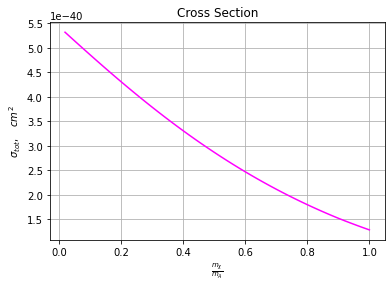

In [6]:
plt.xlabel(r'$\frac{m_{\chi}}{m_{A}}$')
plt.ylabel(r'$\sigma_{tot}, \quad cm^2$')
plt.title('Cross Section')
plt.plot(df_xsec.mass_ratio, df_xsec.xsec, color='magenta')
plt.grid()
plt.show()

Mass of $^{180}Ta$ in amu 
179.947464832  
convert to GeV, 1 amu = 0.9315 GeV, hence  
$m_{Ta} = 179.947464832 * 0.9315 = 167.621 \quad GeV$  
reasonable value of $^{180}Ta$ is $3~mg$

In [7]:
# calculate N_0
mass_180Ta = 3e-6
N_0 = mass_180Ta / (1.6603145e-27 * 179.947464832)
N_0

1.004118945790859e+19

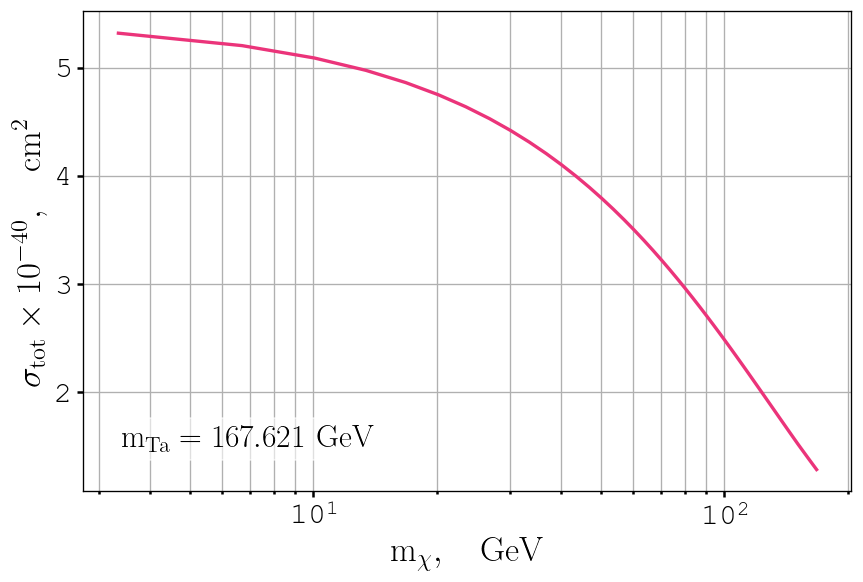

In [109]:
m_Ta = 167.621 # in GeV
color_hex = "#eb347a"

fig_width = 8
fig_height = 5
label_size = 21

fig = plt.figure(figsize=(fig_width, fig_height), dpi=120)
ax = fig.add_axes([0.1, 0.14, 0.8, 0.8])
ax.set_xlabel(r'$\rm m_{\chi}, \quad GeV$', fontsize=label_size, usetex=True)
ax.set_ylabel(r'$\rm \sigma_{tot} \times 10^{-40}, \quad cm^2$', fontsize=label_size, usetex=True)

ax.semilogx()
# ax.semilogy()
ax.tick_params(axis='both', which='both', labelsize=18, width=1.5)
ax.grid(which="both")
ax.plot(df_xsec.mass_ratio * m_Ta , df_xsec.xsec * 1e40, color=color_hex, linewidth=2)
ax.text(0.05, 0.08, fr'$\rm m_{{Ta}} = {m_Ta}$ GeV', fontsize=19,
    ha='left', va='bottom', color='black', backgroundcolor=(1, 1, 1, 0.6), transform=ax.transAxes, usetex=True)


plt.show()

fig.savefig("xsec_as_wimp_mass.pdf")

## Interpolation function for Cross Section

In [9]:
xsec_interpolation = sp.interpolate.interp1d(df_xsec.mass_ratio * m_Ta , df_xsec.xsec,kind='cubic')

In [10]:
set_of_Xpoints = np.random.uniform(3.5, 167, 500)
set_of_Ypoints = xsec_interpolation(set_of_Xpoints)

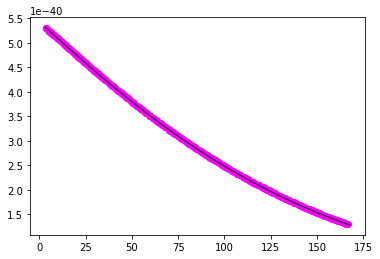

In [11]:
plt.plot(set_of_Xpoints, set_of_Ypoints, 'o', color='magenta')
plt.plot(df_xsec.mass_ratio * m_Ta , df_xsec.xsec, color=color_hex)
plt.show()

`interp1d` can be used for the case of cross section, agreement is very good.

Formula for calculation of the $T_{1/2}$:  


$$T_{1/2} = \frac{\phi \cdot \sigma_{N\chi} \cdot N_0 \cdot T \cdot \varepsilon \cdot \ln(2)}{n_{up}}$$

In [12]:
# list of parameters
eff = 0.9
# n_up = 3.09 # if bkg = 0
# N_0 = 1e22
# t_exp = np.arange(1, 11) * 365 * 24 * 3600
# t_exp = np.arange(1, 11) # in years
t_exp = [1, 3, 5, 7, 10]
# upper limits according to FC
n_up_array = [2.33, 1.63, 1.54, 1.51, 1.49]

In [13]:
def flux(wimp_mass):
    return 2.1e38 * m_Ta / wimp_mass

In [14]:
mass_points = np.arange(3.5, 167.5, 0.5)
# mass_points
# xsec_interpolation(mass_points)

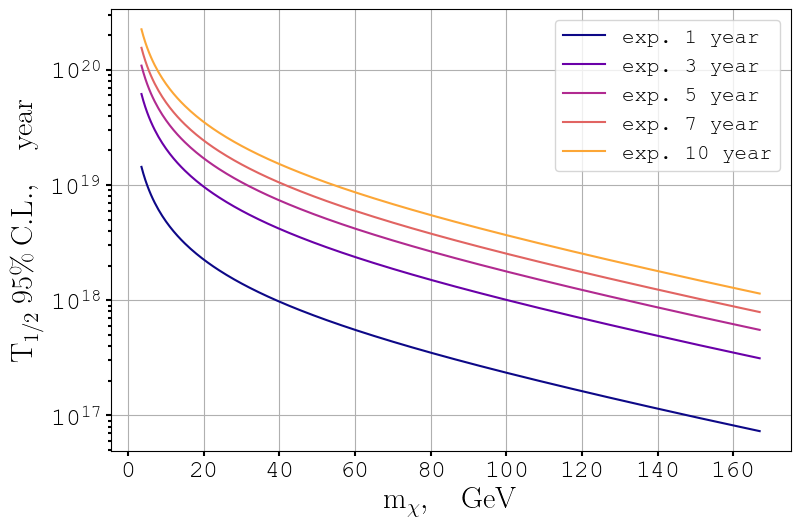

In [65]:
# from matplotlib.colors import LinearSegmentedColormap
import matplotlib.cm as cm
from matplotlib.font_manager import FontProperties

# Define a custom colormap for the lines
cmap = cm.plasma
# cmap = LinearSegmentedColormap.from_list("line_colors", ["blue", "green", "red"])

font_style = {'font.family': 'serif', 'font.serif': ['Courier New']}
# font_style = {'font.family': 'serif', 'font.serif': ['Tahoma']}
plt.rcParams.update(font_style)

set_of_Xpoints = mass_points

fig = plt.figure(figsize=(8, 5.2), dpi=100)
ax = fig.add_axes([0.14, 0.14, 0.85, 0.85])

for i, (time, n_up) in enumerate(zip(t_exp, n_up_array)):
    set_of_Ypoints = xsec_interpolation(mass_points) * flux(mass_points) * N_0 * time * eff * np.log(2) / n_up
    
    # Apply the colormap to lines
    line_color = cmap(i / len(t_exp))  # Adjust color progression
    ax.plot(set_of_Xpoints, set_of_Ypoints, label=f"exp. {time} year", color=line_color)

ax.semilogy()
ax.legend(fontsize=15)
ax.tick_params(axis='both', which='both', labelsize=18, width=1.5)
ax.grid()
# ax.set_xlabel(r'$m_{\chi}, \quad GeV$', fontsize=12, fontweight='bold')
# ax.set_ylabel(r'$T_{1/2} \: 95\% \: C.L., \quad year$', fontsize=12, fontweight='bold')

# font = FontProperties()
# font.set_family('serif')
# font.set_name('Courier New')

label_size = 22
ax.set_xlabel(r'$\rm m_{\chi}, \quad GeV$', fontsize=label_size, usetex=True)
# ax.set_xlabel(r'WIMP mass, GeV', fontsize=15, fontweight='bold', fontproperties=font)
ax.set_ylabel(r'${\rm T_{1/2} \: 95\% \: C.L., \quad year}$', fontsize=label_size, usetex=True)
# ax.set_ylabel(r'$T_{1/2} \: 95\% \: C.L., \quad year$', fontsize=12, fontweight='bold', usetex=True)

# plt.tight_layout()
plt.show()
fig.savefig("T_12_as_function_wimp_mass.pdf")

In [56]:
# amu to kg
mass_for_exp = 1.6603145e-27 * N_0 * 179.947464832
mass_for_exp

0.002987693850988097